# EE 399
### Ting Jones
### 4/17/23
### HW 2



In [1]:
# github page: https://github.com/tingjones
# HW 2 repo: https://github.com/tingjones/ee399_hw2

In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib
from matplotlib import pyplot as plt

## Problem A

In [3]:
# load data, and save images into X
results=loadmat('yalefaces.mat')
X=results['X']

#  get first 100 images
hundr = X[:, :100]
C = np.ndarray((100, 100))

# correlation matrix C, dot product between first 100 images   
C = np.ndarray((100, 100))
C = np.dot(np.transpose(hundr), hundr)

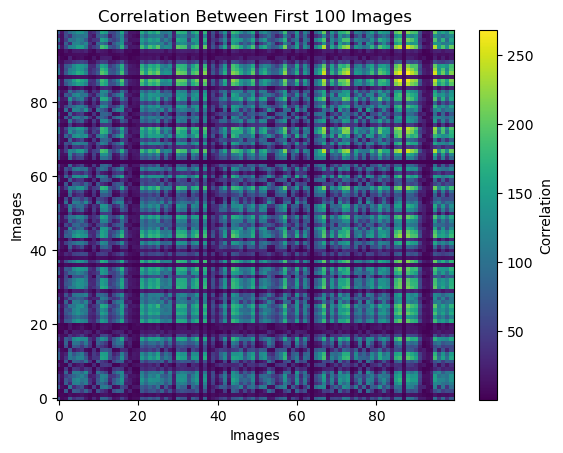

In [4]:
fig, ax = plt.subplots()

ab = ax.pcolor(range(0, 100), range(0, 100), C, vmin = np.min(C), vmax=np.max(C))
ax.set_title("Correlation Between First 100 Images")
ax.set_xlabel("Images")
ax.set_ylabel("Images")
fig.colorbar(ab, ax=ax, label="Correlation")

## Problem b

In [61]:
# get the second most correlated image as a scalar
# the greatest correlation is inherently larger
large = np.sort(C)[-1, -2]

# get indices for the two images most correlated
indices = np.argwhere(C >= large)

print(indices)

[[37 88]
 [44 86]
 [44 88]
 [57 88]
 [67 67]
 [67 72]
 [67 73]
 [67 85]
 [67 86]
 [67 88]
 [67 89]
 [67 95]
 [72 67]
 [72 72]
 [72 88]
 [73 67]
 [73 73]
 [73 86]
 [73 88]
 [73 89]
 [73 95]
 [85 67]
 [85 86]
 [85 88]
 [85 95]
 [86 44]
 [86 67]
 [86 73]
 [86 85]
 [86 86]
 [86 88]
 [86 89]
 [86 90]
 [86 95]
 [86 99]
 [88 37]
 [88 44]
 [88 57]
 [88 67]
 [88 72]
 [88 73]
 [88 85]
 [88 86]
 [88 88]
 [88 89]
 [88 90]
 [88 95]
 [88 99]
 [89 67]
 [89 73]
 [89 86]
 [89 88]
 [89 89]
 [89 95]
 [90 86]
 [90 88]
 [95 67]
 [95 73]
 [95 85]
 [95 86]
 [95 88]
 [95 89]
 [95 95]
 [99 86]
 [99 88]]


In [29]:
print(np.argwhere(C > np.sort(C)[-1:, -2:]))

ValueError: operands could not be broadcast together with shapes (100,100) (1,2) 

In [ ]:
# function to get the parameter values from sweep1, sweep2, for errors in 31x31 array temp
  # that are less than a desired amount, lim
def getLim(temp, lim, sweep1, sweep2):
  limited = temp < lim
  ct_lim = limited.sum()
  mins_temp = np.transpose(np.nonzero(limited)) # the indices in temp that are in the bright yellow region
  print(ct_lim, "coordinates:")

  for i in range(0, ct_lim):
    print("(", '%.2f' %  sweep1[mins_temp[i][0]], ", ", '%.2f' %  sweep2[mins_temp[i][1]], ")", sep="", end=" ")

In [ ]:
# generate 2d loss landscape for each combination
# on a logarithmic scale, so the differences between smaller values is more visible
fig, axs = plt.subplots(3, 2, figsize=(9,9))

ax1 = axs[0,0]
ab = ax1.pcolor(c_r, d_r, save_ab, norm=matplotlib.colors.LogNorm(vmin=np.min(save_ab), vmax=np.max(save_ab)), cmap='viridis_r')
ax1.set_title("Fix A and B")
ax1.set_xlabel("C")
ax1.set_ylabel("D")
fig.colorbar(ab, ax=ax1, label="Error")

ax2 = axs[0,1]
ac = ax2.pcolor(b_r, d_r, save_ac, norm=matplotlib.colors.LogNorm(vmin=np.min(save_ac), vmax=np.max(save_ac)), cmap='viridis_r')
ax2.set_title("Fix A and C")
ax2.set_xlabel("B")
ax2.set_ylabel("D")
fig.colorbar(ac, ax=ax2, label="Error")

plt.suptitle("2D Loss Landscape")
plt.tight_layout()
plt.show()

In [ ]:
print("Estimate of number of errors within dark blue region and their coordinates:")
print("Fixing AB. Coordinates are in (C, D):")
getLim(save_ab, 7, c_r, d_r)
print("\nFixing AC. Coordinates are in (B, D):")
getLim(save_ac, 2.5, b_r, d_r)
print("\nFixing AD. Coordinates are in (B, C):")
getLim(save_ad, 10.5, b_r, c_r)
print("\nFixing BC. Coordinates are in (A, D):")
getLim(save_bc, 2, a_r, d_r)
print("\nFixing BD. Coordinates are in (A, C):")
getLim(save_bd, 50, a_r, c_r)
print("\nFixing CD. Coordinates are in (A, B):")
getLim(save_cd, 2, a_r, c_r)

Estimate of number of errors within dark blue region and their coordinates:
Fixing AB. Coordinates are in (C, D):
9 coordinates:
(0.00, 41.00) (0.00, 42.17) (0.00, 43.33) (1.33, 20.00) (1.33, 21.17) (1.33, 22.33) (1.33, 23.50) (1.33, 24.67) (1.33, 25.83) 
Fixing AC. Coordinates are in (B, D):
14 coordinates:
(-0.93, 28.17) (-0.93, 29.33) (-0.13, 28.17) (-0.13, 29.33) (-0.13, 30.50) (-0.07, 27.00) (-0.07, 28.17) (0.07, 27.00) (0.07, 28.17) (0.13, 28.17) (0.13, 29.33) (0.13, 30.50) (0.93, 28.17) (0.93, 29.33) 
Fixing AD. Coordinates are in (B, C):
2 coordinates:
(-0.13, 1.33) (0.13, 1.33) 
Fixing BC. Coordinates are in (A, D):
6 coordinates:
(0.60, 31.67) (1.50, 30.50) (1.50, 31.67) (2.40, 30.50) (2.40, 31.67) (3.30, 31.67) 
Fixing BD. Coordinates are in (A, C):
124 coordinates:
(-12.00, -1.33) (-12.00, 0.00) (-12.00, 1.33) (-12.00, 2.67) (-11.10, -1.33) (-11.10, 0.00) (-11.10, 1.33) (-11.10, 2.67) (-10.20, -1.33) (-10.20, 0.00) (-10.20, 1.33) (-10.20, 2.67) (-9.30, -1.33) (-9.30, 0.00) 

For the 2D loss landscape, the minima can be observed by the bright yelow region. 

By visualizing results on a logarithmic scale, the differences between very small errors is accentuated, as larger error values are more flattened. Therefore, viewing each plot and visually trying to identify the brightest regions separated by darker regions within the range I have selected:
* Fixing AB seems to have two minima
* Fixing AC seems to have four very distinct minima, with maybe six total due to some faint blue in between
* Fixing AD has a very solid yellow bar, so the minima seems to be across a line
* Fixing BC has one minima, as it is surrounded by darker regions
* Fixing BD also has a very solid yellow bar, so the minima seems to be across a line
* Fixing CD appears to have four minima as the lighter yellow in between stays consistent, meaning the error is consistent and is not actively going downhill until approaching the four minima at the edges.

## Problem 2iii

In [ ]:
# training data is the first 20 data points
x_train = x[:20]
y_train = y[:20]

In [ ]:
# define the objective functions for line (Ax + B) and parabola (Ax^2 + Bx + C)
def fit_line(c, x, y):
    model = c[0] * x + c[1]
    er = np.sqrt(np.sum((model-y)**2)/len(x))
    return er

def fit_parab(c, x, y):
    model = c[0] * x ** 2 + c[1] * x + c[2]
    er = np.sqrt(np.sum((model-y)**2)/len(x))
    return er

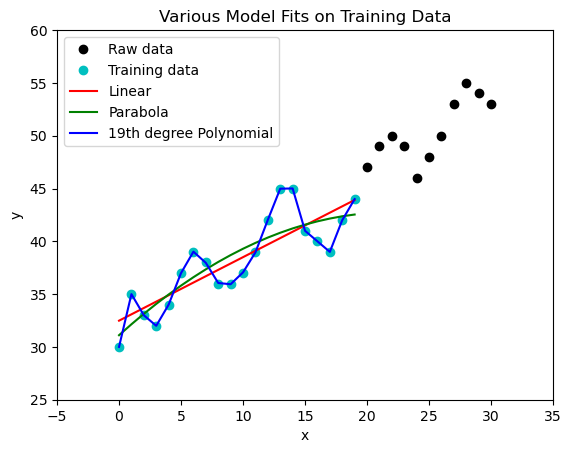

In [ ]:
# set the initial guess for the parameters on line and parabola functions
line0 = np.array([1, 20])
parab0 = np.array([1, 5, 20])

# perform optimization and save parameters
res_line = opt.minimize(fit_line, line0, args=(x_train, y_train))
res_parab = opt.minimize(fit_parab, parab0, args=(x_train, y_train))
res_poly = np.polyfit(x_train, y_train, 19, full=True)

# get the optimized parameters
mins_line = res_line.x
mins_parab = res_parab.x
mins_poly = res_poly[0]

# generate data for plotting
y_line = (mins_line[0] * x_train + mins_line[1])
y_parab = (mins_parab[0] * x_train ** 2 + mins_parab[1] * x_train + mins_parab[2])
y_poly = np.polyval(mins_poly, x_train)

# plot the training and raw data and the fitted curves
plt.figure(4)
plt.plot(x[-11:], y[-11:], 'ko', label='Raw data')
plt.plot(x_train, y_train, 'co', label='Training data')
plt.plot(x_train, y_line, 'r-', label='Linear')
plt.plot(x_train, y_parab, 'g-', label='Parabola')
plt.plot(x_train, y_poly, 'b-', label='19th degree Polynomial')

plt.title("Various Model Fits on Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5,35)
plt.ylim(25, 60)
plt.legend()
plt.show()

In [ ]:
# the rest of the points are the test data
x_test = x[-11:]
y_test = y[-11:]

In [ ]:
# least-squares error for the trained models
line_er_tr = fit_line(mins_line, x_train, y_train)
parab_er_tr = fit_parab(mins_parab, x_train, y_train)
poly_er_tr = np.sqrt(np.sum((y_poly - y_train) ** 2) / len(x_train))

# least-squares error for the model on the test data
line_er_te = fit_line(mins_line, x_test, y_test)
parab_er_te = fit_parab(mins_parab, x_test, y_test)

poly_eval_test = np.polyval(mins_poly, x_test)
poly_er_te = np.sqrt(np.sum((poly_eval_test - y_test) ** 2) / len(x_test))

print("LSE for Line:")
print("Training:", line_er_tr)
print("Test:", line_er_te, "\n")
print("LSE for Parabola:")
print("Training:", parab_er_tr)
print("Test:", parab_er_te, "\n")
print("LSE for 19th degree Polynomial:")
print("Training:", poly_er_tr)
print("Test:", poly_er_te)

LSE for Line:
Training: 2.242749386808813
Test: 3.363641412261731 

LSE for Parabola:
Training: 2.125539348281517
Test: 8.71367634873211 

LSE for 19th degree Polynomial:
Training: 0.028351970844281614
Test: 28625160311.531895


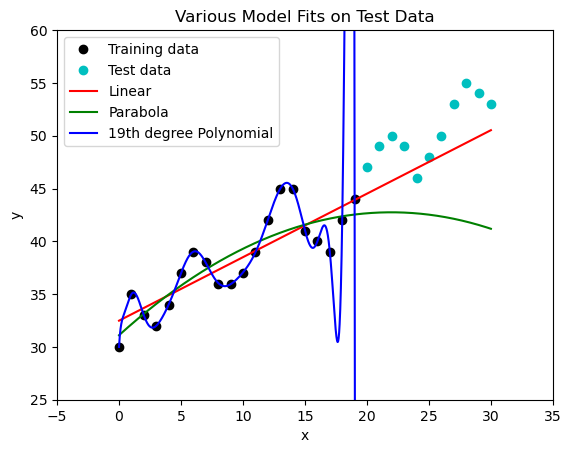

In [ ]:
# generate data for plotting
x_test_res = np.arange(x[0], x[30], 0.01)
y_line_test = (mins_line[0] * x_test_res + mins_line[1])
y_parab_test = (mins_parab[0] * x_test_res ** 2 + mins_parab[1] * x_test_res + mins_parab[2])
y_poly_test = np.polyval(mins_poly, x_test_res)

# plot the trained model (shows polynomial)
plt.figure(5)
plt.plot(x[:20], y[:20], 'ko', label='Training data')
plt.plot(x_test, y_test, 'co', label='Test data')
plt.plot(x_test_res, y_line_test, 'r-', label='Linear')
plt.plot(x_test_res, y_parab_test, 'g-', label='Parabola')
plt.plot(x_test_res, y_poly_test, 'b-', label='19th degree Polynomial')

plt.title("Various Model Fits on Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5,35)
plt.ylim(25, 60)
plt.legend()
plt.show()

## Problem 2iv

In [ ]:
x_train2 = np.concatenate((x[:10], x[-10:]))
y_train2 = np.concatenate((y[:10], y[-10:]))

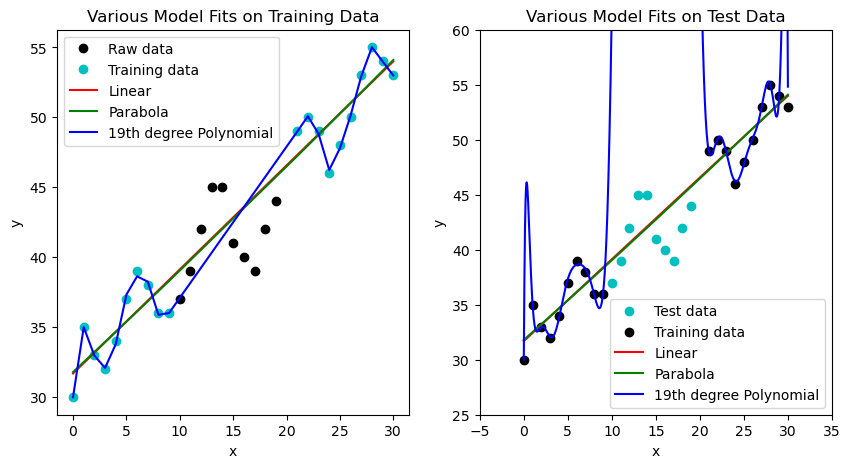

<Figure size 640x480 with 0 Axes>

In [ ]:
# set the initial guess for the parameters
line0 = np.array([1, 20])
parab0 = np.array([1, 5, 10])

# perform optimization and save parameters
res_line = opt.minimize(fit_line, line0, args=(x_train2, y_train2))
res_parab = opt.minimize(fit_parab, parab0, args=(x_train2, y_train2))
res_poly = np.polyfit(x_train2, y_train2, 19, full=True)

# get the optimized parameters
mins_line = res_line.x
mins_parab = res_parab.x
mins_poly = res_poly[0]

# generate data for plotting training results
y_line = (mins_line[0] * x_train2 + mins_line[1])
y_parab = (mins_parab[0] * x_train2 ** 2 + mins_parab[1] * x_train2 + mins_parab[2])
y_poly = np.polyval(mins_poly, x_train2)

x_test_res2 = np.arange(x[0], x[30], 0.01)
# generate data for plotting test results
y_line_test = (mins_line[0] * x_test_res2 + mins_line[1])
y_parab_test = (mins_parab[0] * x_test_res2 ** 2 + mins_parab[1] * x_test_res2 + mins_parab[2])
y_poly_test = np.polyval(mins_poly, x_test_res2)

# plot results of training
plt.figure(5, figsize=(10,5))
plt.subplot(121)
plt.title("Various Model Fits on Training Data")
plt.plot(x[10:20], y[10:20], 'ko', label='Raw data')
plt.plot(x_train2, y_train2, 'co', label='Training data')
plt.plot(x_train2, y_line, 'r-', label='Linear')
plt.plot(x_train2, y_parab, 'g-', label='Parabola')
plt.plot(x_train2, y_poly, 'b-', label='19th degree Polynomial')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# plot the trained model on all data
plt.subplot(122)
plt.title("Various Model Fits on Test Data")
plt.plot(x[10:20], y[10:20], 'co', label='Test data')
plt.plot(x_train2, y_train2, 'ko', label='Training data')
plt.plot(x_test_res2, y_line_test, 'r-', label='Linear')
plt.plot(x_test_res2, y_parab_test, 'g-', label='Parabola')
plt.plot(x_test_res2, y_poly_test, 'b-', label='19th degree Polynomial')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5,35)
plt.ylim(25, 60)
plt.legend()

plt.show()
plt.tight_layout()

In [ ]:
x_test2 = x[10:20]
y_test2 = y[10:20]

# least-squares error for the trained models
line_er_tr = fit_line(mins_line, x_train2, y_train2)
parab_er_tr = fit_parab(mins_parab, x_train2, y_train2)
poly_er_tr = np.sqrt(np.sum((y_poly - y_train2) ** 2) / len(x_train2))

# least-squares error for the model on the test data
line_er_te = fit_line(mins_line, x_test2, y_test2)
parab_er_te = fit_parab(mins_parab, x_test2, y_test2)

poly_eval_test = np.polyval(mins_poly, x_test2)
poly_er_te = np.sqrt(np.sum((poly_eval_test - y_test2) ** 2) / len(x_test2))

print("LSE for Line:")
print("Training:", line_er_tr)
print("Test:", line_er_te, "\n")
print("LSE for Parabola:")
print("Training:", parab_er_tr)
print("Test:", parab_er_te, "\n")
print("LSE for 19th degree Polynomial:")
print("Training:", poly_er_tr)
print("Test:", poly_er_te)

LSE for Line:
Training: 1.8516699043294083
Test: 2.9403079808919426 

LSE for Parabola:
Training: 1.8508364117810228
Test: 2.9058235982125935 

LSE for 19th degree Polynomial:
Training: 0.16382109812247853
Test: 507.59385904316963


For applying the model on the test data in the last two problems, using the first 10 and last 10 data points as training data with the middle 10 used as testing, the minimized error for each function has reduced. For the polynomial, by a lot. Each model has parameters that are optimized closer to the raw data as the error returned a lesser value than before, when only the first 20 data points made up the training dataset. This is likely due to the model being shaped to both the beginning and end points and therefore being more controlled throughout all datapoints instead of just being limited by the first few data points.